In [2]:
!pip install scattertext

     ----                                     0.8/8.2 MB 2.2 kB/s eta 0:55:47


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\HP\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read op

In [3]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 172.2 kB/s eta 0:00:00


# Importing Libraries

In [4]:
import os
import pandas as pd

import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

from textblob import TextBlob

import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Analysis => Load the dataset!

In [5]:
imdb_reviews = pd.read_csv('./train.csv')
imdb_reviews.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
imdb_reviews['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

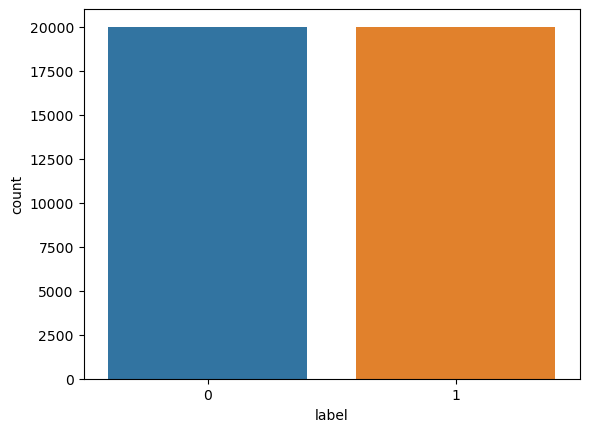

In [7]:
sns.countplot(imdb_reviews['label'])

# Text Preprocessing

In [8]:
'''
1. Converting the text to lowercase
2. Removing any URLs from the text
3. Removing punctuation marks from the text
4. Removing common words (stopwords) from the text
5. Correcting any misspelt words
'''

'\n1. Converting the text to lowercase\n2. Removing any URLs from the text\n3. Removing punctuation marks from the text\n4. Removing common words (stopwords) from the text\n5. Correcting any misspelt words\n'

In [ ]:
def text_preprocessing_pipeline(corpus):
    corpus['text'] = corpus['text'].str.lower()
    corpus['text'] = corpus['text'].str.replace(r"https\S+","", regex=True)
    corpus['text'] = corpus['text'].str.replace('[^A-Za-z0-9]+',' ', regex = True)
    corpus['text'] = corpus['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords.words('english')))
    corpus['text'] = corpus['text'].apply(lambda x: str(TextBlob(x).correct()))
    
reviews = text_preprocessing_pipeline(imdb_reviews)
reviews.head()

# Tokenization and Lemmatization

In [ ]:
'''
Applying tokenization and Lemmatization to our Clean Movie Reviews
'''

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemmatize_text_join(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
def to_sentence(text):
    return ' '.join(word for word in text)

In [ ]:
reviews['lemmatized_tokens'] = reviews['text'].apply(lemmatize_text)
reviews.head()

In [ ]:
reviews['lemmatized_tokens'] = reviews['lemmatized_tokens'].apply(lambda x:to_sentence(x))

# Text Exploratory Analysis

In [ ]:
import itertools
import collections
import pandas as pd
import matplotlib.pyplot as plt

lemmatized_tokens = list(reviews["lemmatized_tokens"])
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30),
                            columns = ['words','count'])
fig , ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by = 'count').plot.barh(x = 'words',
                                                 y = 'count',
                                                 ax = ax,
                                                 color = "purple")
ax.set_title("Most Frequently used words in Reviews")
plt.show()

# Bigrams

In [ ]:
bigrams = zip(token_list, token_list[1:])
counts_no = collections.Counter(bigrams)

# Visualization of Sentiment Words

In [ ]:
corpus = reviews.loc[(reviews['label'] == "Positive") | (reviews['label'] == "Negative")]
corpus = st.CorpusFromParsedDocuments(corpus.iloc[:2000,:],category_col = 'label').build()
html = st.produce_scattertext_explorer(corpus, category = "Positive",
                                       category_name = "Nagative",
                                       not_category_name = "Positive",
                                       minimum_term_frequency = 5,
                                       width_in_pixels = 1000,
                                       transform = st.Scalers.log_scale_standardize)
file_name = 'Sentimental Words Visualization.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1000, height = 700)

# Word Embeddings

In [ ]:
'''
Some popular and strainghtforward methods for creating vector representations of words include:
Word2Vec
Glove
Bag-of-words
TF-IDF => In this blog, we will keep ourselves confined to the TF-IDF Vectorizer.
ELMO(Embeddings for Language Models)

=> Let's implement Tf-IDF on our movie reviews
'''

# TF-IDF Vectorizer

In [ ]:
tfidf_converter = TfidfVectorizer(max_features = 2000)
features = tfidf_converter.fit_transform(reviews['lemmatized_tokens']).toarray()

# Models Building => with Algorithm Light GBM

# Training Model

In [ ]:
target = reviews['label']
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3)

In [ ]:
clf = lgb.LGBMClassifier(max_depth=20,
                        n_estimators =25,
                         min_child_wieght=0.0016,
                         n_jobs = -1)
clf.fit(X_train,y_train)

# Evaluation

In [ ]:
'''
Accuracy on the Testing dataset
'''
pred = clf.predict(X_test)
print("Test data Accuracy is : ",accuracy_score(y_test,pred))

In [ ]:
'''
Classification Report
'''
print(classification_report(y_test,pred))

In [ ]:
'''
Confusion matrix plot
'''
cm = confusion_matrix(y_test, pred)
cm_matrix = create_ticks(cm)
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')